In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('seaborn-white')

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

### 1. Generate a random predictor X from a normal distribution of length n = 100, as well as a noise vector e of length n = 100. Generate a response vector Y of length n = 100 according to the model Y = β0 + β1X + β2X^2 + β3X^3 + e, where β0, β1, β2, β3 are constants of your choice.

In [2]:
np.random.seed(222)
X = np.random.normal(0, 1, 100)
e = np.random.normal(0, 0.3, 100)
Y = 1 + 0.5*X + 0.4*X**2 + 0.6*X**3 + e

In [3]:
print("The shapes of X: %s" % X.shape, "\nThe shapes of Y: %s" % Y.shape)

The shapes of X: 100 
The shapes of Y: 100


In [4]:
X

array([ 1.96342502,  0.27576969,  0.4586582 ,  1.00126466, -0.76383531,
        0.72192766, -0.90546956,  1.00187339, -0.52074247,  0.30895287,
        0.1131885 , -0.16233418,  0.91394627,  0.04421404, -1.45779793,
       -0.6001931 ,  1.55093923, -0.46453073, -0.22405652, -1.64075145,
       -0.62625805, -0.74761329,  1.10934361, -0.52384044,  0.43307391,
        0.39708062,  0.04430649,  0.82473962, -0.89872147,  0.47398593,
        1.30196696, -0.55253401,  0.24311182,  0.12508241, -0.99303729,
       -0.87371004, -0.9639354 , -0.62864526,  0.60152994, -1.72016881,
        1.92264533,  1.99257131,  0.03603926,  0.72126269, -0.85572083,
       -0.8831408 ,  1.01304647, -0.31601447, -0.08474375, -0.74927678,
        0.38394798, -0.08137207, -0.84189872, -0.48253238, -0.42680382,
        0.13294238, -0.91291306,  0.94874833, -0.55284127,  0.83002567,
        0.60594797,  0.13904955, -0.68651382, -0.62930065, -1.77727573,
       -2.03994018, -0.09286767,  0.72720045,  0.43635813, -0.32

### 2. Fit the Ridge model to the simulated data, using X, X^2, . . . , X^10 as predictors. Use cross-validation (10-fold) to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates and discuss the results.

In [5]:
X = pd.DataFrame(X)
# poly = PolynomialFeatures(degree = 10)
X_poly = PolynomialFeatures(degree = 10).fit_transform(X)
X_poly = pd.DataFrame(X_poly)
X_poly.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.963425,3.855038,7.569078,14.861316,29.179080,57.290937,112.486458,220.858726,433.639547,851.418735
1,1.0,0.275770,0.076049,0.020972,0.005783,0.001595,0.000440,0.000121,0.000033,0.000009,0.000003
2,1.0,0.458658,0.210367,0.096487,0.044254,0.020298,0.009310,0.004270,0.001958,0.000898,0.000412
3,1.0,1.001265,1.002531,1.003799,1.005068,1.006339,1.007612,1.008886,1.010162,1.011440,1.012719
4,1.0,-0.763835,0.583444,-0.445655,0.340407,-0.260015,0.198609,-0.151704,0.115877,-0.088511,0.067608


In [6]:
X_poly = StandardScaler().fit_transform(X_poly)

In [7]:
X_poly

array([[ 0.        ,  2.12834006,  2.67845932, ...,  1.4153034 ,
         1.2057606 ,  0.92613273],
       [ 0.        ,  0.27477226, -0.66718093, ..., -0.21365216,
        -0.1246903 , -0.17370634],
       [ 0.        ,  0.47564044, -0.54826522, ..., -0.21363796,
        -0.12468757, -0.17370581],
       ...,
       [ 0.        , -0.28878232, -0.68463786, ..., -0.21365233,
        -0.12469034, -0.17370634],
       [ 0.        ,  0.55484421, -0.48509533, ..., -0.21360595,
        -0.12468007, -0.17370405],
       [ 0.        , -1.26561621,  0.38944926, ..., -0.19449304,
        -0.1336704 , -0.16944625]])

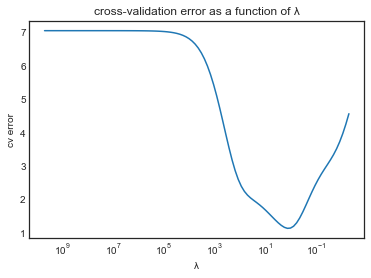

In [8]:
alphas = 10**np.linspace(10,-2,100)*0.5
# print(alphas)
# alphas = [0, 0.001, 0.01, 0.1, 1, 10]
ridge = Ridge()
cv_val = []

for a in alphas:
    ridge.set_params(alpha=a, random_state=42)
    errors = np.sum(-cross_val_score(ridge, 
                                 X_poly, 
                                 y=Y, 
                                 scoring='neg_mean_squared_error', 
                                 cv=10, 
                                 n_jobs=-1))
    cv_val.append(np.sqrt(errors))
# print(cv_val)

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv error')
plt.title('cross-validation error as a function of λ');

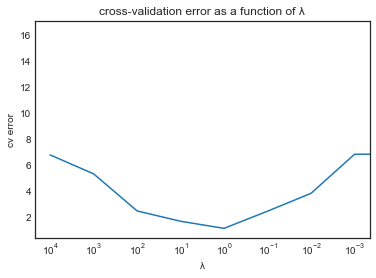

In [9]:
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge = Ridge()
cv_val = []

for a in alphas:
    ridge.set_params(alpha=a, random_state=42)
    errors = np.sum(-cross_val_score(ridge, 
                                 X_poly, 
                                 y=Y, 
                                 scoring='neg_mean_squared_error', 
                                 cv=10, 
                                 n_jobs=-1))
    cv_val.append(np.sqrt(errors))

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv error')
plt.title('cross-validation error as a function of λ');

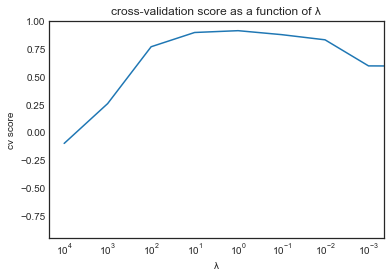

In [10]:
# alphas = 10**np.linspace(10,-2,100)*0.5
# alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge = Ridge()
cv_val = []

for a in alphas:
    ridge.set_params(alpha=a)
    cv_val.append(cross_val_score(ridge, X_poly, Y, cv=10).mean())

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv score')
plt.title('cross-validation score as a function of λ');

[ 0.          0.24916501  0.15227795  3.3386599   0.42107491 -6.18388874
  2.58980143  8.17607806 -5.90600575 -3.50164211  3.11953174]
[ 0.          0.31830854  0.11319682  2.57988833  0.98716875 -2.80270166
 -0.25665293  2.02007923 -0.32057493  0.39369893 -0.56881579]
[ 0.          0.3775817   0.13188852  2.11998453  0.89425113 -1.3914657
 -0.06042689  0.20219762 -0.49361796  1.21964763 -0.52460703]
[ 0.          0.49765278  0.22920881  1.46296568  0.70660521 -0.28684701
 -0.16132705  0.01563686 -0.42206665  0.64815633 -0.20987903]
[ 0.          0.60964804  0.36519294  0.94055503  0.3053849   0.38424245
 -0.01331997  0.1712608  -0.17698485  0.10163577 -0.21259248]
[ 0.          0.65842743  0.35011726  0.72318134  0.2006234   0.45326272
  0.02909795  0.2224555  -0.09263499  0.05680888 -0.16679153]
[0.         0.4738793  0.18605632 0.44691771 0.14142625 0.32337179
 0.08831441 0.21458433 0.04638478 0.13294022 0.01756619]
[0.         0.13100116 0.07225754 0.14003957 0.07763381 0.12362364


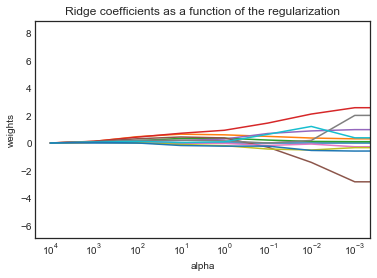

In [11]:
# alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_poly, Y)
    coefs.append(ridge.coef_)
    print(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [12]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

X_poly = np.array(X_poly)
Y = np.array(Y)

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)
# alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(X_poly, Y):
        
        # split data
        X_train, X_val = X_poly[train_index], X_poly[val_index]
        y_train, y_val = Y[train_index], Y[val_index]

        # instantiate model
        ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=77)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, ridge)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))

alpha:      0 | mean(train_error):  0.0991 | mean(val_error): 23.3971
alpha:  0.001 | mean(train_error):  0.0996 | mean(val_error): 1.1737
alpha:   0.01 | mean(train_error):  0.1001 | mean(val_error): 0.3893
alpha:    0.1 | mean(train_error):  0.1024 | mean(val_error): 0.3391
alpha:      1 | mean(train_error):  0.1073 | mean(val_error): 0.1354
alpha:     10 | mean(train_error):  0.1247 | mean(val_error): 0.2993
alpha:    100 | mean(train_error):  0.4754 | mean(val_error): 0.5822
alpha:   1000 | mean(train_error):  2.3461 | mean(val_error): 2.7995
alpha:  10000 | mean(train_error):  4.3785 | mean(val_error): 4.6153


Taking into account the above obtained graphs, we can say that the optimal value for λ (ridge regularization) is 1

In [13]:
ridge = Ridge(alpha=1)
ridge.fit(X_poly, Y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [14]:
ridge.coef_

array([ 0.        ,  0.60964804,  0.36519294,  0.94055503,  0.3053849 ,
        0.38424245, -0.01331997,  0.1712608 , -0.17698485,  0.10163577,
       -0.21259248])

So we must take all features except X^0

### Fit the Lasso model to the simulated data, using X, X^2, . . . , X^10 as predictors. Use cross-validation (10-fold) to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates and discuss the results.

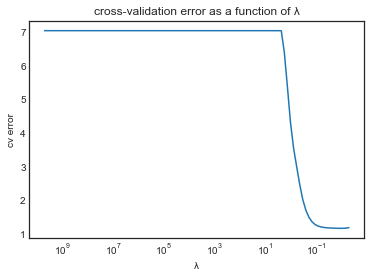

In [15]:
alphas = 10**np.linspace(10,-2,100)*0.5
# alphas = [0, 0.001, 0.01, 0.1, 1, 10]
lasso = Lasso()
cv_val = []

for a in alphas:
    lasso.set_params(alpha=a, random_state=42)
    errors = np.sum(-cross_val_score(lasso, 
                                 X_poly, 
                                 y=Y, 
                                 scoring='neg_mean_squared_error', 
                                 cv=10, 
                                 n_jobs=-1))
    cv_val.append(np.sqrt(errors))

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv error')
plt.title('cross-validation error as a function of λ');

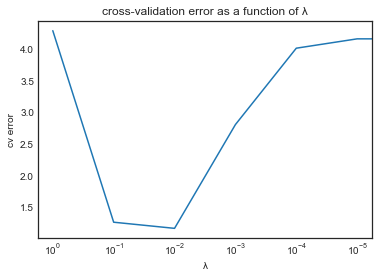

In [16]:
alphas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
lasso = Lasso()
cv_val = []

for a in alphas:
    lasso.set_params(alpha=a, random_state=42)
    errors = np.sum(-cross_val_score(lasso, 
                                 X_poly, 
                                 y=Y, 
                                 scoring='neg_mean_squared_error', 
                                 cv=10, 
                                 n_jobs=-1))
    cv_val.append(np.sqrt(errors))

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv error')
plt.title('cross-validation error as a function of λ');

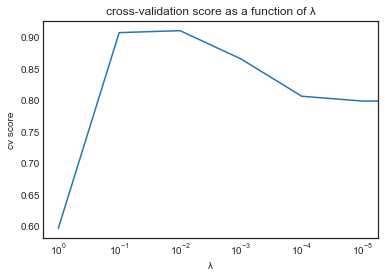

In [17]:
# alphas = 10**np.linspace(10,-2,100)*0.5
# alphas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
lasso = Lasso()
cv_val = []

for a in alphas:
    lasso.set_params(alpha=a)
    cv_val.append(cross_val_score(lasso, X_poly, Y, cv=10).mean())

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv score')
plt.title('cross-validation score as a function of λ');

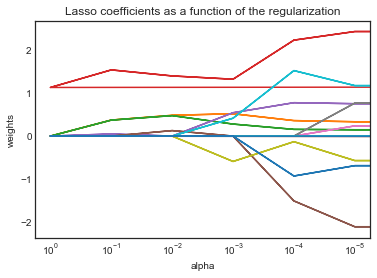

In [18]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(X_poly, Y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [19]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)
# alphas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(X_poly, Y):
        
        # split data
        X_train, X_val = X_poly[train_index], X_poly[val_index]
        y_train, y_val = Y[train_index], Y[val_index]

        # instantiate model
        lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lasso)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))

alpha:      0 | mean(train_error): 0.1006 | mean(val_error): 0.5555
alpha:  1e-05 | mean(train_error): 0.1007 | mean(val_error): 0.5589
alpha: 0.0001 | mean(train_error): 0.1008 | mean(val_error): 0.4845
alpha:  0.001 | mean(train_error): 0.1034 | mean(val_error): 0.3934
alpha:   0.01 | mean(train_error): 0.1102 | mean(val_error): 0.1402
alpha:    0.1 | mean(train_error): 0.1269 | mean(val_error): 0.1587
alpha:      1 | mean(train_error): 1.3381 | mean(val_error): 1.7262


Taking into account the above obtained graphs, we can say that the optimal value for λ (lasso regularization) is 0.01.

In [20]:
lasso = Lasso(alpha=0.01).fit(X_poly, Y)

In [21]:
lasso.coef_

array([ 0.        ,  0.48146376,  0.47425746,  1.3940553 ,  0.        ,
        0.12712897,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ])

So we must choose X^1, X^2, X^3, X^5